Deteksi Komentar Buzzer dan Bot pada TikTok Menggunakan Cosine Similarity dan K-Means Clustering: Studi Kasus pada Postingan 'Peringatan Darurat



Penerapan Natural Language Processing dan Time Series Analysis untuk Deteksi Komentar Bot dan Buzzer pada Platform TikTok dalam Postingan 'Indonesia Darurat



Analisis Deteksi Komentar Buzzer dan Bot pada TikTok Berbasis Machine Learning: Studi Kasus pada Postingan 'Peringatan Darurat' dan 'Indonesia Darurat'



Deteksi Komentar Buzzer dan Bot pada TikTok Berbasis Machine Learning: Studi Kasus pada Postingan TikTok 'Peringatan Darurat'

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [84]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Akmal
[nltk_data]     Fauzan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [85]:
data1 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-15_22-53-24-681.csv')
data2 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-15_22-54-08-174.csv')
data3 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-15_23-04-05-456.csv')
data4 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-15_23-16-43-640.csv')
data5 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-15_23-40-27-202.csv')
data6 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-24_13-15-54-231.csv')
data7 = pd.read_csv('../data/dataset_tiktok-comments-scraper_2024-09-24_13-22-53-896.csv')

In [86]:
data1 = data1[['uniqueId', 'text', 'createTimeISO']]
data2 = data2[['uniqueId', 'text', 'createTimeISO']]
data3 = data3[['uniqueId', 'text', 'createTimeISO']]
data4 = data4[['uniqueId', 'text', 'createTimeISO']]
data5 = data5[['uniqueId', 'text', 'createTimeISO']]
data6 = data6[['uniqueId', 'text', 'createTimeISO']]
data7 = data7[['uniqueId', 'text', 'createTimeISO']]

In [87]:
print(data1.duplicated().sum())
print(data2.duplicated().sum())
print(data3.duplicated().sum())
print(data4.duplicated().sum())
print(data5.duplicated().sum())
print(data6.duplicated().sum())
print(data7.duplicated().sum())

0
0
0
0
0
1
0


In [88]:
tiktok = pd.concat([data1, data2, data3, data4, data5, data6, data7], ignore_index=True)

In [89]:
tiktok.shape

(16022, 3)

In [90]:
tiktok.duplicated().sum()

6916

In [91]:
tiktok.shape

(16022, 3)

In [92]:
tiktok.drop_duplicates(inplace=True)

In [93]:
tiktok.duplicated().sum()

0

In [94]:
tiktok.head()

,uniqueId,text,createTimeISO
0,nadiacha28,Si provokator 🤣🔥,2024-08-24T04:57:12.000Z
1,muzza657,provokator,2024-08-23T07:32:50.000Z
2,zaraziimpzay,can anyone summarize this in English? I'm not Indonesian but I'm really intrigued with what's happening in Indonesia rn,2024-08-23T02:00:36.000Z
3,aaaacdee,i think mata najwa should make an interview with buzzers about how it works,2024-08-23T22:27:16.000Z
4,zahirazara95,hurra,2024-08-23T09:28:36.000Z


In [95]:
tiktokData = tiktok[['uniqueId', 'text', 'createTimeISO']]

In [96]:
tiktokData.duplicated().sum()

0

In [97]:
def preprocess_text(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

In [98]:
tiktokData['text'] = tiktokData['text'].apply(preprocess_text)

In [99]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

unique_words = set()
tiktokData['text'].str.split().apply(unique_words.update)


stemmed_words = {word: stemmer.stem(word) for word in tqdm(unique_words, desc="Stemming words")}

def stemWithDict(text):
    return ' '.join([stemmed_words.get(word, word) for word in text.split()])

Stemming words: 100%|██████████| 12471/12471 [22:58<00:00,  9.05it/s] 


In [100]:
tiktokData['text'] = tiktokData['text'].apply(stemWithDict)

In [101]:
vectorData =  tiktokData['text']

In [102]:
vectorizer = TfidfVectorizer().fit_transform(vectorData)

In [103]:
cosine_sim = cosine_similarity(vectorizer)

In [104]:
cosine_sim

array([[1.        , 0.74568665, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.74568665, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [105]:
cosineSim = pd.DataFrame(cosine_sim, columns=tiktokData.index, index=tiktokData.index)

In [106]:
cosineSim.sum().sort_values(ascending=False)

2064     445.981065
6243     439.711352
4321     425.380922
27       425.380922
3463     425.380922
            ...    
11893      0.000000
11892      0.000000
13402      0.000000
11891      0.000000
14875      0.000000
Length: 9106, dtype: float64

In [107]:
tiktokData['max_cosine_sim'] = cosineSim.apply(lambda row: row.drop(row.name).max(), axis=1)

In [108]:
threshold = 0.7
tiktokData['similar_comments_count'] = cosineSim.apply(lambda row: (row > threshold).sum() - 1, axis=1)

In [109]:
similar_comments = []

for idx, row in cosineSim.iterrows():
    similar_indices = row[row > threshold].index.tolist()

    if idx in similar_indices:
        similar_indices.remove(idx)

    if similar_indices:
        original_comment = tiktokData.loc[idx, 'text']
        similar_comments_texts = tiktokData.loc[similar_indices, 'text'].tolist()
        similar_comments.append((original_comment, similar_comments_texts))

In [110]:
similarComments = pd.DataFrame(similar_comments, columns=["Komentar", "Komentar Mirip"])

In [111]:
pd.set_option('display.max_colwidth', None)

In [112]:
similarComments.sample(10)

,Komentar,Komentar Mirip
1691,1 keluarga kuasa negara,"[negara 1 keluarga, negara 1 keluarga, negara keluarga]"
644,apakabar ruu ampas aset,[apakabar ruu ampas aset nek]
1038,merdeka,[indonesia merdeka aja]
244,ruu ampas aset gimana,"[ruu ampas aset, ruu ampas aset darurat, ruu ampas gimana, ruu ampas gimana, darurat ruu ampas aset, ruu ampas aset, ruu ampas aset, ruu ampas aset gimana mbak nana, ampas aset gimana, ruu ampas gimana, darurat ruu ampas aset, ampas aset gimana, ruu ampas aset gimana tuh, ruu ampas aset darurat, ruu ampas aset, ampas aset gimana darurat ga, darurat ruu ampas aset, ruu ampas aset gimana, ruu ampas aset, ruu ampas aset darurat, ruu ampas aset gimana mbak, ruu ampas aset gimana, ruu ampas aset mbak gimana ya, ruu ampas aset darurat, ruu ampas aset , ruu ampas aset darurat, ruu ampas aset, ruu ampas aset, ruu ampas aset, ruu ampas aset, ruu ampas gimana, ruu ampas aset gimana darurat gak, ruu ampas aset gimana, uu ampas aset gimana, ruu ampas aset, ruu ampas aset gimana, ruu ampas aset, ruu ampas aset darurat, ampas aset gimana mbak, ruu ampas aset, gimana ruu ampas aset, ruu ampas aset, ruu ampas aset, ruu ampas aset, ruu ampas aset gimana kabar nya, ruu ampas aset]"
876,darurat,"[darurat y, darurat, darurat, darurat penting darurat, darurat , darurat, darurat, darurat darurat, darurat, darurat, darurat , darurat y, darurat, darurat, darurat, darurat, darurat, darurat , darurat, darurat, darurat darurat, darurat , darurat, darurat darurat, darurat, darurat darurat yg, darurat, darurat, darurat, darurat indonesia darurat, darurat , darurat , darurat, darurat , darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat darurat, darurat, darurat emang darurat, darurat , darurat]"
1982,waras gws,"[gws, gws, gws]"
1815,putus mk viral,[viral]
970,salah giring opini,[lucu giring opini]
268,penting darurat,"[lucu ingat darurat penting darurat , penting darurat, ingat darurat penting darurat, penting , darurat penting darurat, ingat darurat penting darurat , penting darurat, darurat penting politik, penting darurat, penting darurat yg, ingat darurat penting darurat, ingat darurat penting darurat, penting darurat, ingat darurat penting darurat , yg darurat penting, darurat penting , penting darurat, darurat penting, penting darurat ya mbak, ingat darurat penting darurat, penting darurat, penting darurat, penting politik darurat gilir penting negara ga darurat , penting darurat, penting darurat, penting darurat, penting darurat , penting darurat, ingat penting, yg penting darurat, penting darurat, penting darurat, penting darurat , darurat penting ya mbak, penting darurat , penting darurat, ingat darurat penting darurat, penting rakyat penting partai ]"
618,1 lucu lawak,"[lawak , lawak, lawak, lawak, lawak, lawak, lawak, darurat lawak, lawak]"


In [113]:
# Menghitung jumlah komentar per akun
tiktokData['comment_count'] = tiktokData.groupby('uniqueId')['uniqueId'].transform('count')

# Mengonversi kolom 'createTimeISO' menjadi format datetime
tiktokData['createTimeISO'] = pd.to_datetime(tiktokData['createTimeISO'])

# Menghitung time_diff hanya untuk akun dengan lebih dari satu komentar
tiktokData['time_diff'] = 0

# Hitung jumlah komentar per akun
comment_counts = tiktokData['uniqueId'].value_counts()

# Filter akun yang memiliki lebih dari satu komentar
multiple_comment_accounts = comment_counts[comment_counts > 1].index

# Hanya untuk akun yang memiliki lebih dari satu komentar, hitung selisih waktu antar komentar
tiktokData.loc[tiktokData['uniqueId'].isin(multiple_comment_accounts), 'time_diff'] = (
    tiktokData.groupby('uniqueId')['createTimeISO']
    .diff().dt.total_seconds()
    .fillna(0)  # Jika komentar pertama, isi dengan 0
)


# tiktokData['avg_time_diff'] = tiktokData.groupby('uniqueId')['time_diff'].transform('mean')
# short_time_threshold = 100
# tiktokData['short_post'] = tiktokData['time_diff'] < short_time_threshold
# tiktokData['comments_in_short_time'] = tiktokData.groupby('uniqueId')['short_post'].transform('sum')
# tiktokData['hour'] = tiktokData['createTimeISO'].dt.hour
# tiktokData['night_activity'] = tiktokData['hour'].apply(lambda x: 1 if 0 <= x <= 6 else 0)
# tiktokData['night_activity_count'] = tiktokData.groupby('uniqueId')['night_activity'].transform('sum')
# tiktokData['similar_comments_ratio'] = tiktokData['similar_comments_count'] / tiktokData['comment_count']
# tiktokData['unique_comments'] = tiktokData.groupby('uniqueId')['text'].transform('nunique')
# tiktokData['first_comment_time'] = tiktokData.groupby('uniqueId')['createTimeISO'].transform('min')
# tiktokData['last_comment_time'] = tiktokData.groupby('uniqueId')['createTimeISO'].transform('max')
# tiktokData['active_duration'] = (tiktokData['last_comment_time'] - tiktokData['first_comment_time']).dt.total_seconds()
# tiktokData['comment_length'] = tiktokData['text'].apply(len)
# tiktokData['avg_comment_length'] = tiktokData.groupby('uniqueId')['comment_length'].transform('mean')

In [114]:
# tiktokData.drop(['short_post', 'night_activity', 'first_comment_time', 'last_comment_time', 'comment_length'], axis=1, inplace=True)

In [115]:
tiktokData.sample(10)

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff
11498,sempurnabiru,ku muncul ambatukam,2024-08-22 10:59:13+00:00,0.349306,0,1,0
14812,soon..21,hina emang negara lucu gimana oknum kek gitu yaa sebar,2024-08-22 11:27:12+00:00,0.393153,0,1,0
14800,honzakisenpai,mending login ml,2024-08-22 11:28:27+00:00,0.285445,0,1,0
2037,ninakrisnadamayanti,laah mbak najwa baik2 aja,2024-08-31 08:08:16+00:00,0.602804,0,1,0
335,proces17,bangun peduli squidward tentacles,2024-08-22 10:40:35+00:00,0.346957,0,1,0
537,hendriiisy,kasih kode gusdur tu sejarah dprmpr pimpin dulu,2024-08-24 15:24:42+00:00,0.363499,0,1,0
508,noviaheew,lucuuu,2024-08-25 07:31:38+00:00,1.000000,3,1,0
13695,zvl383,bubar dpr mpr dprd isi orang2 ormas yg kerja mikirin kuas golong milu,2024-08-23 02:33:09+00:00,0.295911,0,1,0
2642,widayatri.15,najwa udah buat ap utk bangsa inijgn propokasi,2024-08-29 06:28:49+00:00,0.358241,0,1,0
15578,dobleabqary,iya uda jompo pakai pempers lifree jalan seok seok makan bubur hari,2024-08-22 12:46:04+00:00,0.209686,0,1,0


In [116]:
tiktokData.describe()

,max_cosine_sim,similar_comments_count,comment_count,time_diff
count,9106.000000,9106.000000,9106.000000,9.106000e+03
mean,0.501611,2.730837,1.330551,-3.596200e+01
std,0.283746,10.261872,1.491511,2.431121e+04
min,0.000000,-1.000000,1.000000,-1.167630e+06
25%,0.340301,0.000000,1.000000,0.000000e+00
50%,0.476917,0.000000,1.000000,0.000000e+00
75%,0.679622,0.000000,1.000000,0.000000e+00
max,1.000000,95.000000,16.000000,4.436290e+05


In [117]:
tiktokData['comment_count'].value_counts()

comment_count
1     8189
2      454
3      138
4       60
6       60
11      44
5       35
7       35
9       27
16      16
15      15
13      13
12      12
8        8
Name: count, dtype: int64

C:\Users\Akmal Fauzan\AppData\Local\Temp\ipykernel_24628\653384137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='comment_count', data=tiktokData, palette='Blues')


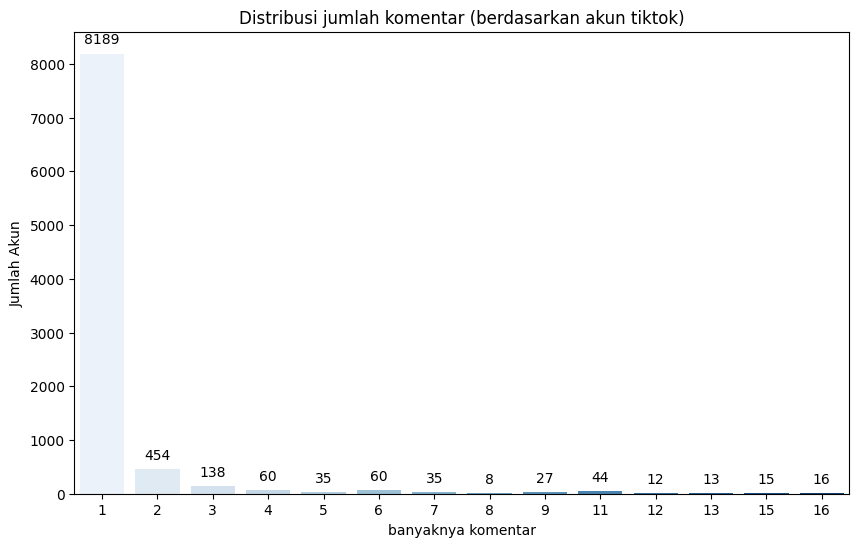

In [118]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='comment_count', data=tiktokData, palette='Blues')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribusi jumlah komentar (berdasarkan akun tiktok)')
plt.xlabel('banyaknya komentar')
plt.ylabel('Jumlah Akun')
plt.show()

In [119]:
tiktokData[tiktokData['comment_count'] == 7].sample(7)

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff
15648,tienaelabni,usia calon kandidat 30 tetap kpu kandidat org calon kandidat usia kpu resmi kandidat,2024-08-22 11:29:44+00:00,0.689397,0,7,70
15420,ahmars0ldier,bubar dpr atas mk dpr bikin uu dlm hari langsung d acc presiden aja berharihari tdk d accuu korupsi,2024-08-22 11:13:44+00:00,1.000000,2,7,-8002
15248,ahmars0ldier,yah ingat darurat,2024-08-22 13:27:06+00:00,0.695002,0,7,7378
3056,beelzebub088,gimanapun gera curang jokowi najwa aja ko proses nya gelar buk suara rakyat yg tentu najwa rakyat pecah belah,2024-08-28 04:23:25+00:00,0.354098,0,7,-193
15651,tienaelabni,batas usia kandidat 30 kandidat pilih lantik,2024-08-22 11:34:26+00:00,0.689397,0,7,24
15573,ahmars0ldier,bubar dpr atas mk dpr bikin uu dlm hari langsung d acc presiden aja berharihari tdk d accuu korupsi,2024-08-22 11:13:48+00:00,1.000000,2,7,4
15086,vzhsb.jey,bentar kak jelas sdkt bingung syarat minimal mk 30th blh tp kaesang blm umur segitu tp udh boleh karna syarat ubah,2024-08-23 15:28:06+00:00,0.333495,0,7,0


In [120]:
tiktokData.loc[tiktokData['uniqueId'] == 'anjink770'].head()

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff
2970,anjink770,yaman,2024-08-28 10:22:32+00:00,1.0,31,3,0
2971,anjink770,yaman,2024-08-28 10:22:27+00:00,1.0,31,3,-5
2972,anjink770,yaman,2024-08-28 10:22:21+00:00,1.0,31,3,-6


In [121]:
tiktokData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9106 entries, 0 to 16021
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   uniqueId                9106 non-null   object             
 1   text                    9106 non-null   object             
 2   createTimeISO           9106 non-null   datetime64[ns, UTC]
 3   max_cosine_sim          9106 non-null   float64            
 4   similar_comments_count  9106 non-null   int64              
 5   comment_count           9106 non-null   int64              
 6   time_diff               9106 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(2)
memory usage: 827.2+ KB


In [122]:
tiktokData.columns

Index(['uniqueId', 'text', 'createTimeISO', 'max_cosine_sim',
       'similar_comments_count', 'comment_count', 'time_diff'],
      dtype='object')

In [123]:
features = ['max_cosine_sim', 'similar_comments_count', 'comment_count', 'time_diff']

In [124]:
scaler = StandardScaler()
scaled = scaler.fit_transform(tiktokData[features])

In [125]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [126]:
tiktokData['cluster'] = kmeans.labels_

In [127]:
tiktokData['cluster'].value_counts()

cluster
0    8665
1     441
Name: count, dtype: int64

In [128]:
tiktokData[tiktokData['cluster'] == 0].sample(7)

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff,cluster
14053,yuryury24,mamam tuh yg milih,2024-08-22 17:24:36+00:00,0.531728,0,1,0,0
12066,7709love,buset gw gin wkwk,2024-08-23 08:10:03+00:00,0.495861,0,1,0,0
858,bramzzz_14,endorse abah anies,2024-09-01 09:55:29+00:00,0.417336,0,1,0,0
13703,trikorihandayani,negara hncur krn udah sepwrti pux negara,2024-08-23 02:29:26+00:00,0.451758,0,1,0,0
14636,myexcel48,bang zharif,2024-08-22 12:31:31+00:00,0.580346,0,1,0,0
12738,dani.suka.bacot,,2024-08-25 08:22:27+00:00,0.000000,-1,1,0,0
15357,ny.jar,salah perintah guna,2024-08-23 10:12:24+00:00,0.599386,0,3,50559,0


In [129]:
tiktokData[tiktokData['cluster'] == 1].sample(7)

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff,cluster
3008,ha_hi_he_,2 lucu,2024-08-28 07:52:07+00:00,1.000000,54,1,0,1
434,ibwaahyu,ampas aset gimana,2024-08-23 11:23:17+00:00,1.000000,23,1,0,1
9341,martinitini513,darurat yaman pulang yaman,2024-08-31 10:32:14+00:00,0.810498,25,1,0,1
7732,permana_transport,provokator,2024-08-24 02:58:53+00:00,1.000000,32,1,0,1
1204,mastamao,ruu ampas aset kawal,2024-08-23 06:08:43+00:00,0.820274,23,1,0,1
51,telurpuyuh44,2 lucu ingat darurat,2024-08-25 08:23:15+00:00,1.000000,71,1,0,1
12847,govenk,ruu ampas aset,2024-08-24 16:55:38+00:00,1.000000,57,1,0,1


In [130]:
tiktokData.loc[tiktokData['comment_count'] > 1].head()

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff,cluster
11,anglcya2106,provokator,2024-08-29 05:17:08+00:00,1.000000,32,5,0,1
68,fadsna21,ruu ampas aset ga darurat kah kak,2024-08-23 10:19:01+00:00,1.000000,3,2,0,0
86,fadsna21,lucu ingat darurat yg abai ampas aset,2024-08-23 10:18:46+00:00,1.000000,6,2,-15,0
133,ciutjang,mba nana emang benarrrrr,2024-09-02 15:16:56+00:00,0.478843,0,3,0,0
208,ojegsepeda,guna lambang simbol negara kenan institusi negara,2024-08-31 15:38:29+00:00,1.000000,1,2,0,0


In [131]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled)

In [132]:
tiktokData['pca1'] = data_pca[:, 0]
tiktokData['pca2'] = data_pca[:, 1]

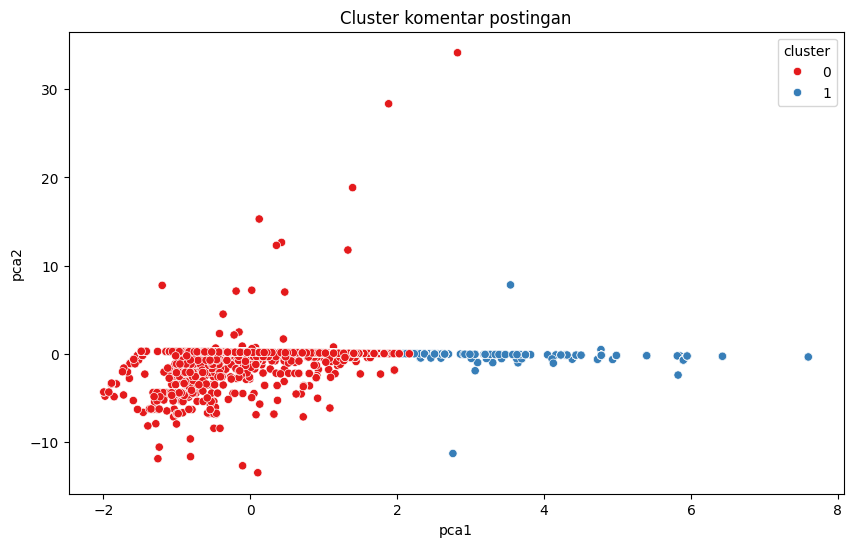

In [133]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=tiktokData, palette='Set1')
plt.title('Cluster komentar postingan')
plt.show()

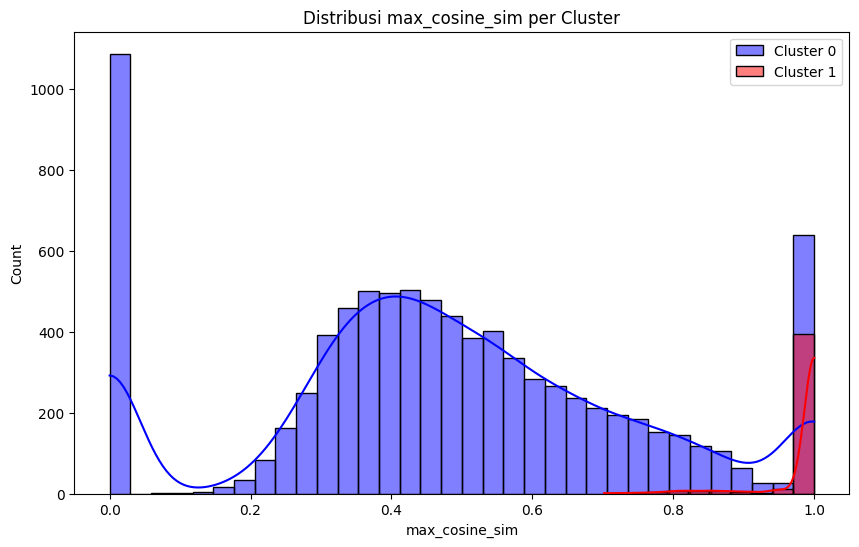

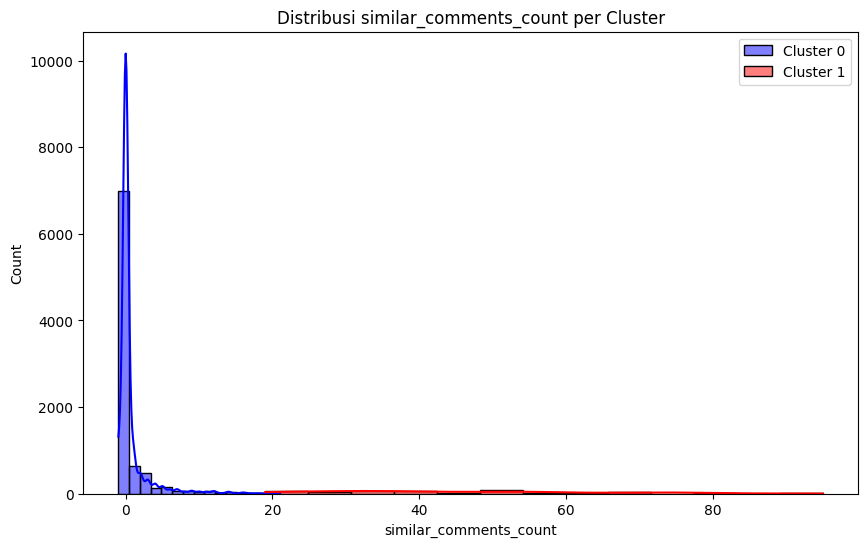

In [134]:
# Visualisasi distribusi max_cosine_sim untuk Cluster 0 dan Cluster 1
plt.figure(figsize=(10,6))
sns.histplot(tiktokData[tiktokData['cluster'] == 0]['max_cosine_sim'], color='blue', label='Cluster 0', kde=True)
sns.histplot(tiktokData[tiktokData['cluster'] == 1]['max_cosine_sim'], color='red', label='Cluster 1', kde=True)
plt.title('Distribusi max_cosine_sim per Cluster')
plt.legend()
plt.show()

# Visualisasi distribusi similar_comments_count untuk Cluster 0 dan Cluster 1
plt.figure(figsize=(10,6))
sns.histplot(tiktokData[tiktokData['cluster'] == 0]['similar_comments_count'], color='blue', label='Cluster 0', kde=True)
sns.histplot(tiktokData[tiktokData['cluster'] == 1]['similar_comments_count'], color='red', label='Cluster 1', kde=True)
plt.title('Distribusi similar_comments_count per Cluster')
plt.legend()
plt.show()

In [135]:
# Menghitung statistik deskriptif untuk Cluster 0
cluster_0_stats = tiktokData[tiktokData['cluster'] == 0][['max_cosine_sim', 'similar_comments_count', 'time_diff']].describe()

# Menghitung statistik deskriptif untuk Cluster 1
cluster_1_stats = tiktokData[tiktokData['cluster'] == 1][['max_cosine_sim', 'similar_comments_count', 'time_diff']].describe()

# Tampilkan hasil
print("Statistik Cluster 0:\n", cluster_0_stats)
print("\nStatistik Cluster 1:\n", cluster_1_stats)


Statistik Cluster 0:
        max_cosine_sim  similar_comments_count     time_diff
count     8665.000000             8665.000000  8.665000e+03
mean         0.476972                0.643047 -4.946763e+01
std          0.268251                2.239033  2.441560e+04
min          0.000000               -1.000000 -1.167630e+06
25%          0.333615                0.000000  0.000000e+00
50%          0.462021                0.000000  0.000000e+00
75%          0.639001                0.000000  0.000000e+00
max          1.000000               21.000000  4.436290e+05

Statistik Cluster 1:
        max_cosine_sim  similar_comments_count      time_diff
count      441.000000              441.000000     441.000000
mean         0.985730               43.752834     229.403628
std          0.047434               17.547990   22184.485486
min          0.701749               19.000000 -281842.000000
25%          1.000000               31.000000       0.000000
50%          1.000000               39.000000    

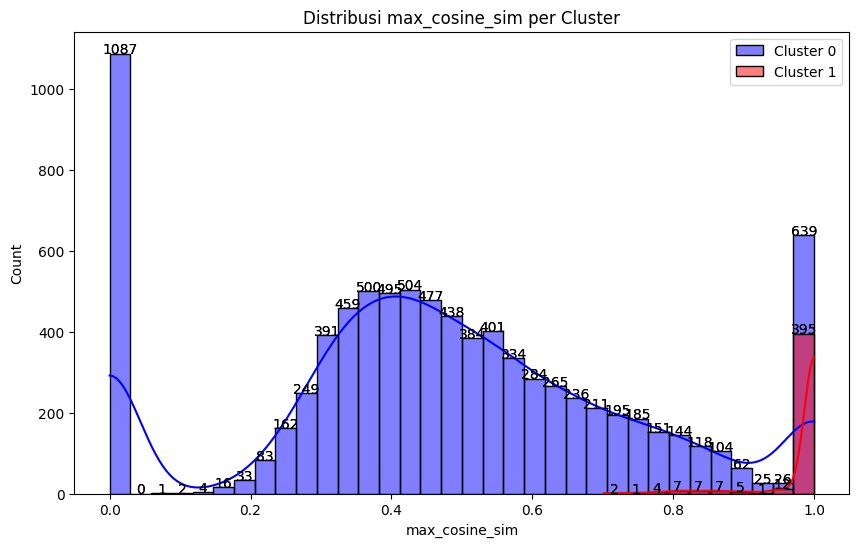

In [136]:
# Visualisasi distribusi max_cosine_sim untuk Cluster 0 dan Cluster 1 dengan angka
plt.figure(figsize=(10,6))

# Plot histogram untuk Cluster 0 dan Cluster 1
cluster_0_hist = sns.histplot(tiktokData[tiktokData['cluster'] == 0]['max_cosine_sim'], color='blue', label='Cluster 0', kde=True)
cluster_1_hist = sns.histplot(tiktokData[tiktokData['cluster'] == 1]['max_cosine_sim'], color='red', label='Cluster 1', kde=True)

# Menambahkan angka di atas histogram
for p in cluster_0_hist.patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center')

for p in cluster_1_hist.patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), ha='center')

plt.title('Distribusi max_cosine_sim per Cluster')
plt.legend()
plt.show()

In [152]:
tiktokData['text'].isnull().sum()

0

In [137]:
tiktokData.to_csv('../data/tiktokData.csv', index=False)

In [138]:
tiktokData.isnull().sum()

uniqueId                  0
text                      0
createTimeISO             0
max_cosine_sim            0
similar_comments_count    0
comment_count             0
time_diff                 0
cluster                   0
pca1                      0
pca2                      0
dtype: int64

In [139]:
def cluster(cluster) :
    if cluster == 0 :
        return 'natural comment'
    else :
        return 'Bot / Buzzer'

tiktokData['cluster'] = tiktokData['cluster'].apply(cluster)

In [140]:
tiktokData['cluster'].value_counts()

cluster
natural comment    8665
Bot / Buzzer        441
Name: count, dtype: int64

In [141]:
X = tiktokData[['max_cosine_sim', 'similar_comments_count', 'comment_count', 'time_diff']]
y = tiktokData['cluster']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [143]:
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [144]:
print(X_train.shape)
print(y_train.shape)

(6374, 4)
(6374,)


In [145]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [147]:
y_pred = model.predict(X_test_scaled)

In [148]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [149]:
print("Akurasi:", accuracy)
print("Laporan Klasifikasi:\n", report)

Akurasi: 0.9996339677891655
Laporan Klasifikasi:
                  precision    recall  f1-score   support

   Bot / Buzzer       1.00      0.99      1.00       135
natural comment       1.00      1.00      1.00      2597

       accuracy                           1.00      2732
      macro avg       1.00      1.00      1.00      2732
   weighted avg       1.00      1.00      1.00      2732



In [175]:
rev = pd.read_csv('../data/tiktokData.csv')

In [176]:
rev[rev['text'].isnull()].head()

,uniqueId,text,createTimeISO,max_cosine_sim,similar_comments_count,comment_count,time_diff,cluster,pca1,pca2
186,madesuartini38,NaN,2024-09-01 09:12:54+00:00,0.0,-1,1,0,0,-1.48425,0.273244
238,chiiiiii_aaaa,NaN,2024-09-02 05:35:34+00:00,0.0,-1,1,0,0,-1.48425,0.273244
239,khas_b,NaN,2024-09-10 08:38:16+00:00,0.0,-1,1,0,0,-1.48425,0.273244
240,kakjel,NaN,2024-09-01 17:33:19+00:00,0.0,-1,1,0,0,-1.48425,0.273244
241,rustamrustam3014,NaN,2024-09-15 12:41:44+00:00,0.0,-1,1,0,0,-1.48425,0.273244


In [177]:
rev.dropna(subset=['text'], inplace=True)

In [178]:
rev['text'].isnull().sum()

0

In [179]:
rev.to_csv('../data/tiktokData.csv', index=False)